In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Folajuwon\\Desktop\\coding stuff\\Projects\\PL predictor\\final_transfers.csv")

In [6]:
df.head()

,club_name,season,players_in,players_out,total_spent,total_income,net_spend,avg_age_in,avg_age_out,loan_in,loan_out
0,AFC Bournemouth,2015/2016,36,33,55.11,0.650,54.460,23.916667,24.757576,22,21
1,AFC Bournemouth,2016/2017,20,29,40.69,23.690,17.000,22.550000,24.724138,13,15
2,AFC Bournemouth,2017/2018,15,14,34.30,0.000,34.300,25.466667,25.071429,10,11
3,AFC Bournemouth,2018/2019,14,16,89.10,20.200,68.900,24.571429,27.000000,9,9
4,AFC Bournemouth,2019/2020,13,13,54.91,34.625,20.285,23.846154,25.307692,7,8


In [7]:
df["club_name"] = df["club_name"].str.strip()

Now I want to visualize some things

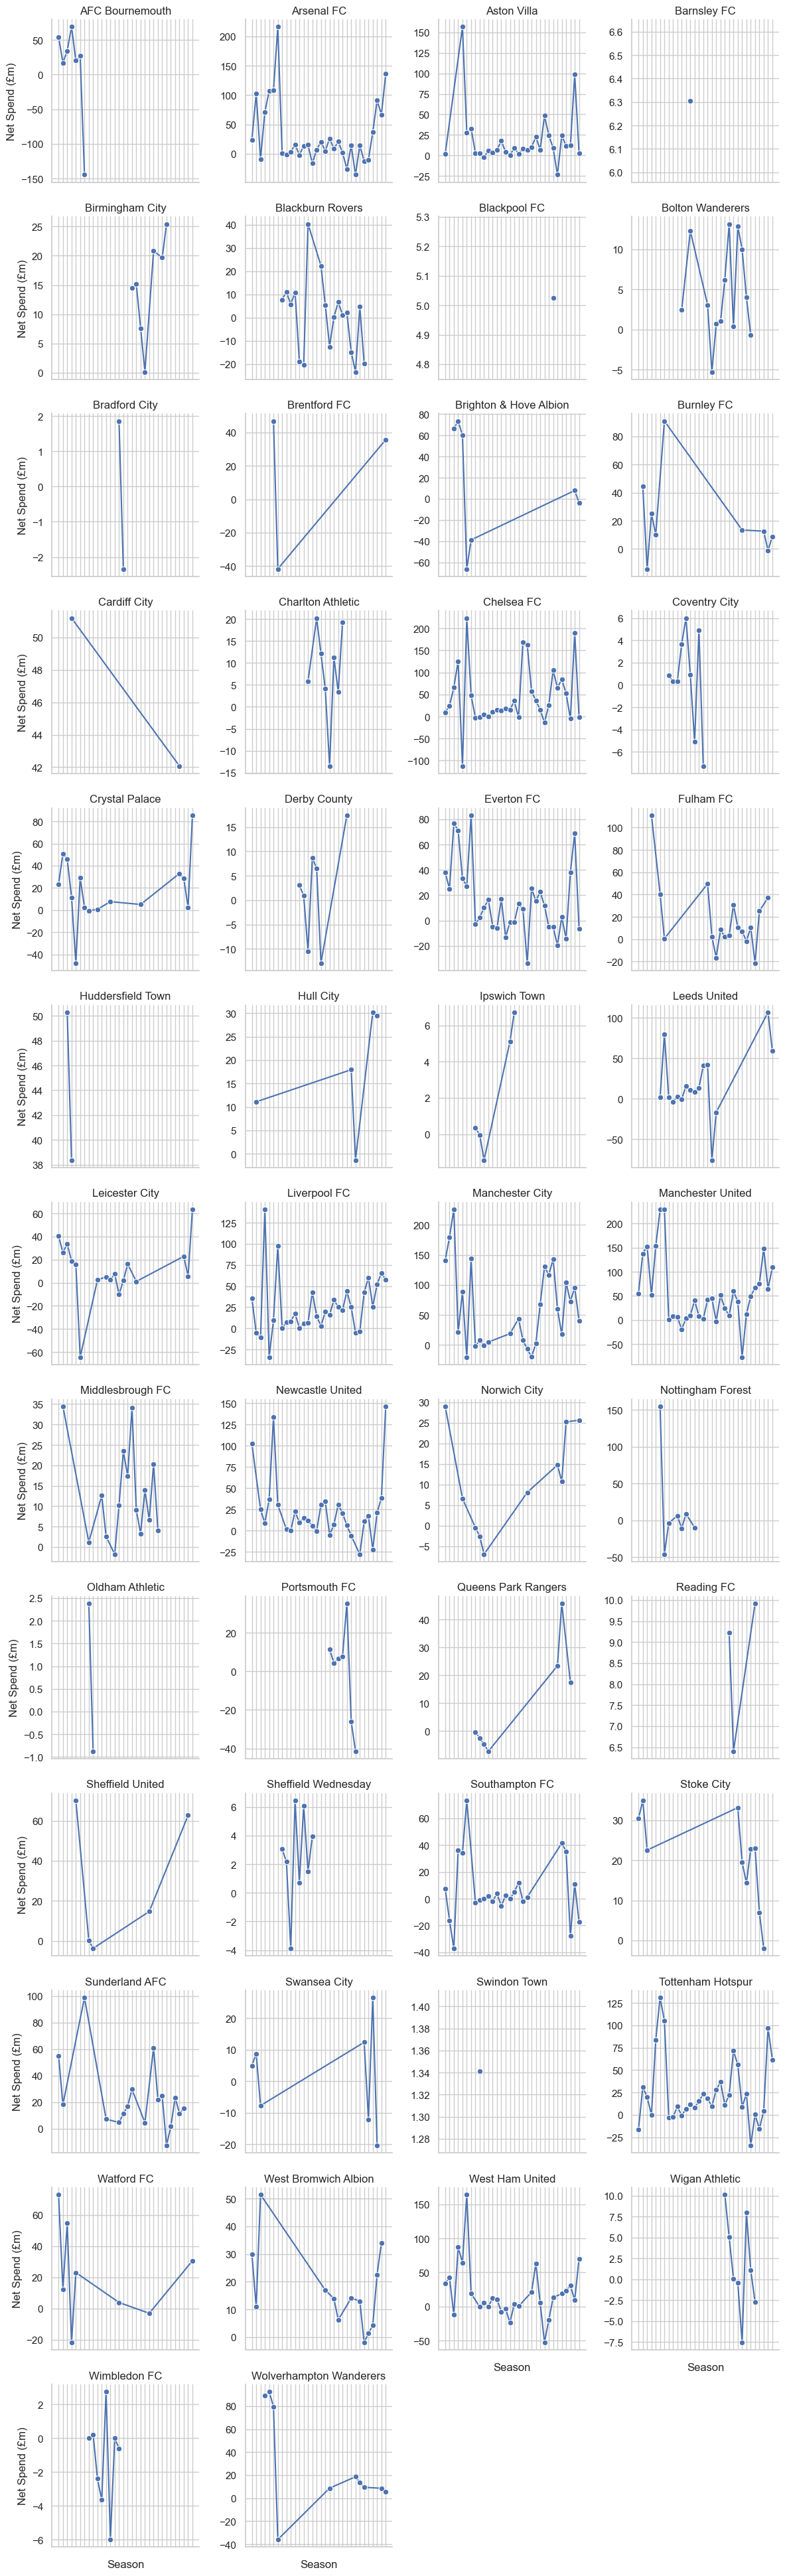

In [13]:
#To see the net spending trends for each club 
df["season"] = df["season"].astype(str)
df["net_spend"] = pd.to_numeric(df["net_spend"], errors="coerce")

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create FacetGrid: one plot per club
g = sns.FacetGrid(
    df,
    col="club_name",
    col_wrap=4,  # Number of plots per row
    height=3,
    sharey=False
)

# Map lineplot to each subplot
g.map_dataframe(
    sns.lineplot,
    x="season",
    y="net_spend",
    marker="o"
)

# Set titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Season", "Net Spend (£m)")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

I want to now see best and worst transfer balances across seasons

In [14]:
balance_summary = (
    df.groupby("club_name")["net_spend"]
    .sum()
    .reset_index()
    .sort_values("net_spend", ascending=False)
)

print("Biggest Net Spenders:")
print(balance_summary.tail(5))

print("\nBiggest Net Earners:")
print(balance_summary.head(5))

Biggest Net Spenders:
          club_name  net_spend
32  Oldham Athletic      1.507
42     Swindon Town      1.341
8     Bradford City     -0.482
33    Portsmouth FC     -1.870
48     Wimbledon FC     -9.629

Biggest Net Earners:
            club_name  net_spend
27  Manchester United   1784.745
26    Manchester City   1684.641
14         Chelsea FC   1431.948
1          Arsenal FC   1016.625
43  Tottenham Hotspur    821.560


C:\Users\Folajuwon\AppData\Local\Temp\ipykernel_33720\2571038769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


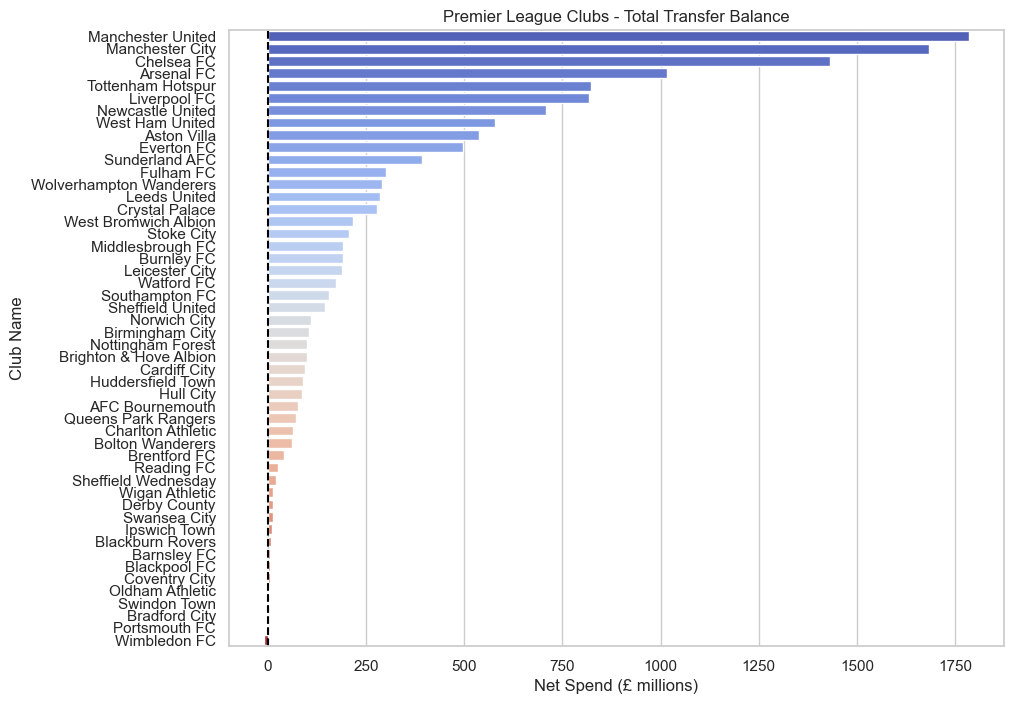

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=balance_summary,
    x="net_spend",
    y="club_name",
    palette="coolwarm"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Premier League Clubs - Total Transfer Balance")
plt.xlabel("Net Spend (£ millions)")
plt.ylabel("Club Name")
plt.show()
